In [1]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Import necessary dataset

from sklearn import datasets
iris=datasets.load_iris()

In [11]:
iris_data = pd.DataFrame(iris.data , columns=iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
X_scaled=scaler.fit_transform(iris_data)

In [17]:
pd.DataFrame(X_scaled , columns=iris_data.columns).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [18]:
## Apply the PCA
from sklearn.decomposition import PCA

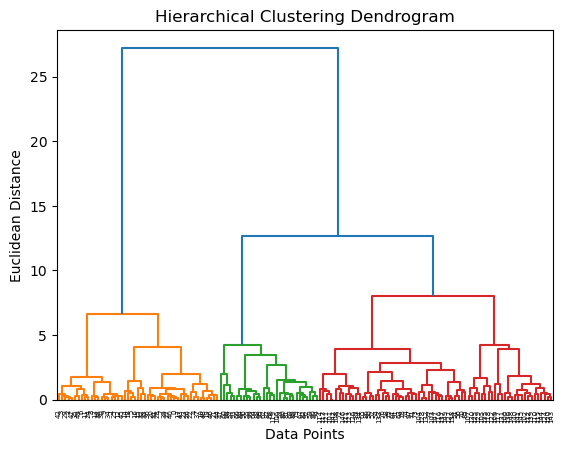

In [23]:
## Agglomerative Clustering
## To construct a dendogram
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold=10)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit(X_scaled)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [35]:
pd.Series(cluster.labels_)[149] , pd.Series(cluster.labels_)[4]

(0, 1)

In [28]:
pd.concat([iris_data ,pd.Series(cluster.labels_)] , axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [36]:
## silhouette score
from sklearn.metrics import silhouette_score

In [37]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

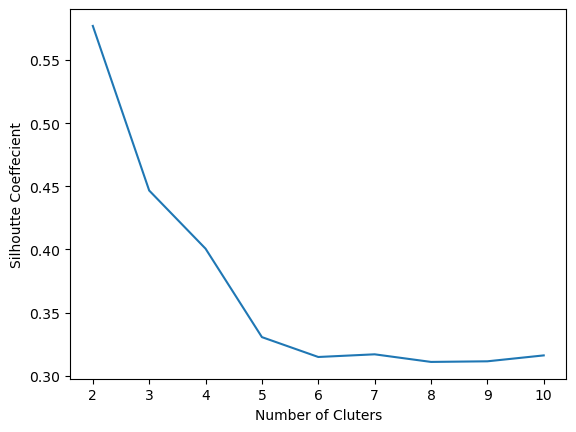

In [38]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()